<a href="https://colab.research.google.com/github/JiahaoXia/Learning-Projects/blob/master/tflite_c01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Copyright The Tensorflow Authors
try:
  %tensorflow_version 2.x
except:
  pass

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import pathlib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [6]:
# create a simple keras model
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 0s 72ms/sample - loss: 43.6832
Epoch 2/200
6/6 [==============================] - 0s 2ms/sample - loss: 34.7374
Epoch 3/200
6/6 [==============================] - 0s 1ms/sample - loss: 27.6918
Epoch 4/200
6/6 [==============================] - 0s 1ms/sample - loss: 22.1411
Epoch 5/200
6/6 [==============================] - 0s 1ms/sample - loss: 17.7669
Epoch 6/200
6/6 [==============================] - 0s 2ms/sample - loss: 14.3183
Epoch 7/200
6/6 [==============================] - 0s 1ms/sample - loss: 11.5981
Epoch 8/200
6/6 [==============================] - 0s 1ms/sample - loss: 9.4512
Epoch 9/200
6/6 [==============================] - 0s 1ms/sample - loss: 7.7554
Epoch 10/200
6/6 [==============================] - 0s 1ms/sample - loss: 6.4146
Epoch 11/200
6/6 [==============================] - 0s 1ms/sample - loss: 5.3534
Epoch 12/200
6/6 [==============================] - 0s 1ms/sample - loss: 4.5121
Epoch 13/2

In [7]:
# generate a savemodel
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [0]:
# convert the savemodel to tflite
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [16]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

In [0]:
# initialize the TFLite interpreter to try it out
# Load TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# test the tensorflow lite model on random input data
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # test the tensorflow model on random input data
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

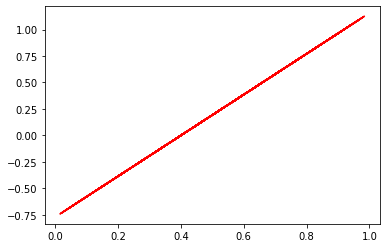

In [21]:
# visualize the model
plt.plot(inputs, outputs, 'r')
plt.show()

In [0]:
# download the tflite model file
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass